## Assignment 2

### Packages and imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Import and greyscale image

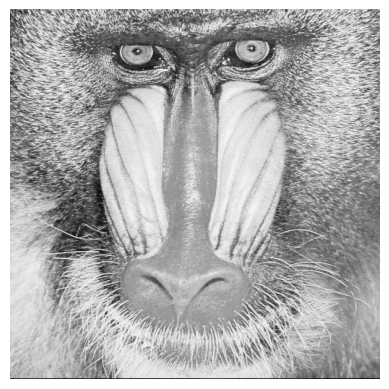

In [ ]:
img_path = 'mandrill.jpg'
mandril = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mandril, cmap='Greys_r')
plt.axis('off')
plt.show()

## Gaussian filtering
for $\sigma = [1, 2,4, 8]$

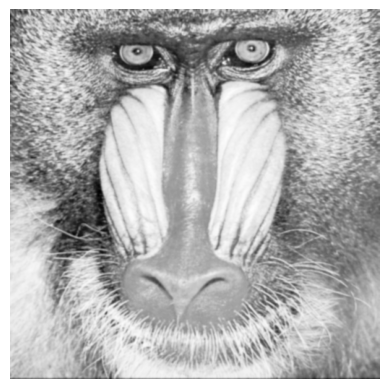

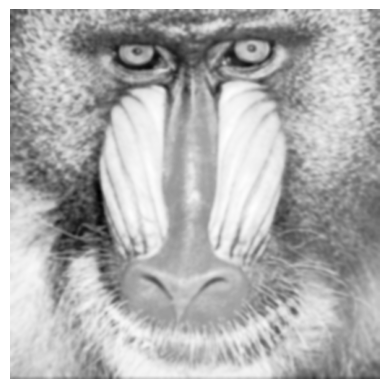

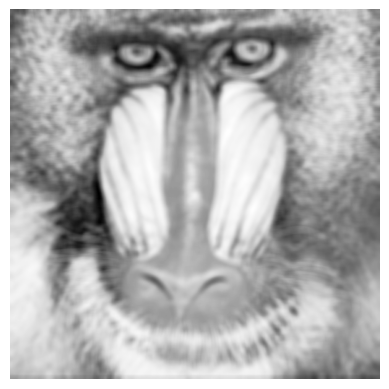

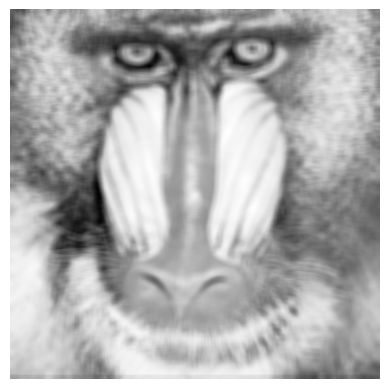

In [24]:
sigma = [1,2,4,8]
kernel_size = (11,11) # tested different kernel sizes
for s in sigma:
    blurred = cv2.GaussianBlur(mandril, kernel_size, s)
    plt.imshow(blurred, cmap='Greys_r')
    plt.axis('off')
    plt.show()

### Explanation

we implimented this section using CV2's Gaussianblur function for different values of $\sigma$, and a  set kernel size. The size of the kernel, and value for sigma decide the amount of blur for the image. As the sigma parameter increases, an increasing amount of blur can be seen on the image. At $\sigma = 1$ hardly any blurring shows up on the image, and most features are retained. This effect increases all the way up to $\sigma =8$ were some of the finer features has dissappeared, and only bolder features remaing.

## Gradient magnitude computation using gaussian derivatives (edge detection)

### Mathematically sound version

In [ ]:
def gaussian_derivatives(image, sigma):

    # Create a grid of (x,y) coordinates (kernel)
    size = int(8*sigma) + 1 # Kernel size varies with sigma
    ax = np.linspace(-(size // 2), size // 2, size) #creates an array from -size/2 to size/2, with 'size' number of elements
    x, y = np.meshgrid(ax, ax)
    
    #Gaussian
    G = (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2)/(2*sigma**2))
    
    # Gaussian derivatives
    dx= -(x / (sigma**2)) * G
    dy= -(y / (sigma**2)) * G

    # Convolve image with Gaussian derivatives
    grad_x = cv2.filter2D(image, -1, dx)
    grad_y = cv2.filter2D(image, -1, dy)

    # Gradient magnitude
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2) # euclidean norm

    return gradient_magnitude


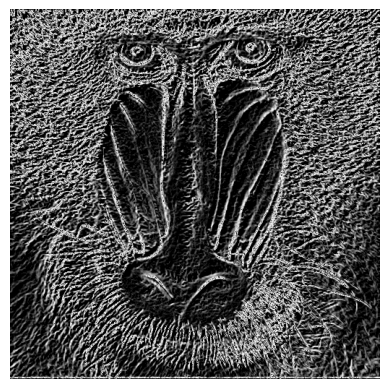

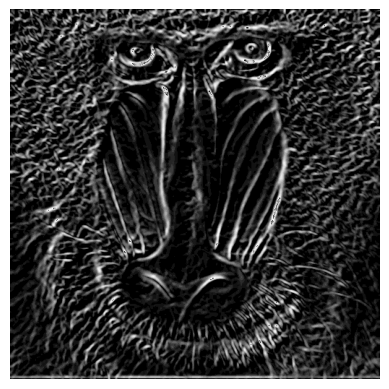

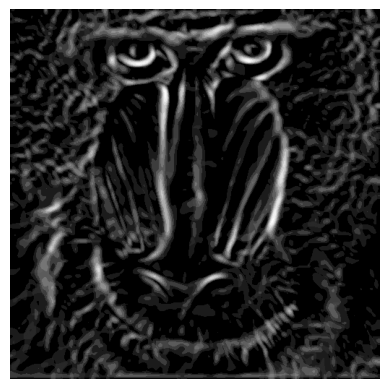

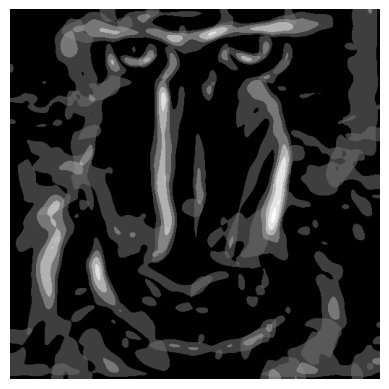

In [26]:
# Display images with different values of sigma
sigma = [1, 2, 4, 8]
for s in sigma:
    magnitude = gaussian_derivatives(mandril, s)
    plt.imshow(magnitude, cmap='Greys_r')
    plt.axis('off')
    plt.show()

In the photos above you can see the result of convolving the mandril.jpeg with gradient magnitude computation using partial derivatives. The photos are shown in order of increasing sigma value with $\sigma = [1,2,4,8]$ The idea is as to both smooth the image and perform edge detection simultaneously, by finding the partial derivatives of the gaussian function, and convolving the image with the partial derivatives seperately, and then computing the gradient magnitude. The magnitude is computed as the euclidean norm for the partial derivatives. which you can think of as combining the horisontal and vertical edges found earlier.

Please notice that i have made the kernel size dependent on sigma, as sigma grows so will the kernel size. In the images this can be seen by $\sigma = 1$ showing the finer details of the image. The finer details are often reffered to as noise, as these finere details arent inherently interesting. As sigma grows to $\sigma =2$ the finest details are removed, the fur of the mandril becomes less noisy. At $\sigma =4$ the more defining features of the mandril's face become more apperent, and at $\sigma = 8$ only the most dominant edges remain, at least when compared to $\sigma =1$. 

## Laplacian-Gaussian filtering

## Canny edge detection